# Лабораторная работа 3

### Вариант 13

Аминов С.С.
М8О-408Б-19

Целью работы является исследование свойств многослойной нейронной сети прямого распространения и алгоритмов ее обучения, применение сети в задачах классификации и аппроксимации функции.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

#### Классификация

In [29]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y

def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

epochs = 500

In [30]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.3, 0.3, 0, 0)

x2, y2 = ellipse(t, 0.7, 0.7, 0, 0)

x3, y3 = parabola(t, 1, -0.8, 0)

(-1.7869604401089358, 19.92616924228765, -1.049136367826184, 6.632343482179861)

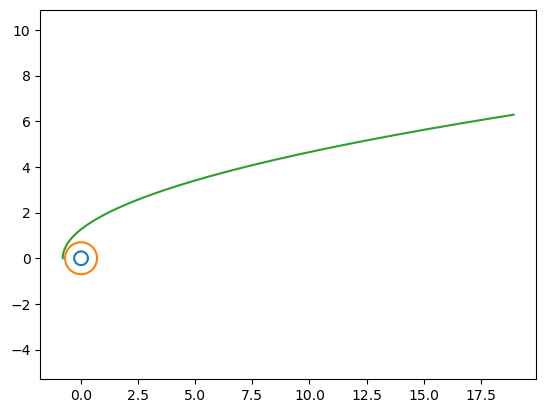

In [31]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.axis('equal')

Готовим датасет

In [32]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3
np.random.shuffle(dataset)

In [33]:
train_percent = 0.8
train_num = int(train_percent * len(dataset))
train_X = [x[0] for x in dataset[:train_num]]
train_y = [x[1] for x in dataset[:train_num]]
test_X = [x[0] for x in dataset[train_num:]]
test_y = [x[1] for x in dataset[train_num:]]

Создаем модель

In [34]:
model =  keras.Sequential([
        layers.Dense(100,input_dim=2, activation="tanh", name="tanh"),
        layers.Dense(3,activation='sigmoid', name="sigmoid")
    ]
)

Компилируем

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем

In [12]:
hist = model.fit(train_X,train_y,batch_size=len(dataset)//10,epochs=epochs)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2282 - mae: 0.4690
Epoch 2/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2006 - mae: 0.4321
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1869 - mae: 0.4069
Epoch 4/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1791 - mae: 0.3912
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1733 - mae: 0.3798
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1685 - mae: 0.3707
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1642 - mae: 0.3629
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1604 - mae: 0.3560
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1570 - mae: 0.3497
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1541 - mae: 0.3437
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1515 

8/8 [==============================] - 0s 1ms/step - loss: 0.1224 - mae: 0.2598
Epoch 177/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1222 - mae: 0.2596
Epoch 178/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1220 - mae: 0.2593
Epoch 179/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1218 - mae: 0.2590
Epoch 180/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1216 - mae: 0.2587
Epoch 181/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1215 - mae: 0.2585
Epoch 182/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1213 - mae: 0.2583
Epoch 183/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1211 - mae: 0.2582
Epoch 184/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1209 - mae: 0.2578
Epoch 185/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1207 - mae: 0.2575
Epoch 186/500
8/8 [==============================] - 0s 1ms/step - loss: 0

8/8 [==============================] - 0s 1ms/step - loss: 0.0547 - mae: 0.1656
Epoch 351/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0543 - mae: 0.1647
Epoch 352/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0540 - mae: 0.1639
Epoch 353/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0535 - mae: 0.1632
Epoch 354/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0530 - mae: 0.1625
Epoch 355/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0526 - mae: 0.1617
Epoch 356/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0521 - mae: 0.1610
Epoch 357/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0518 - mae: 0.1602
Epoch 358/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0513 - mae: 0.1594
Epoch 359/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0509 - mae: 0.1588
Epoch 360/500
8/8 [==============================] - 0s 1ms/step - loss: 0

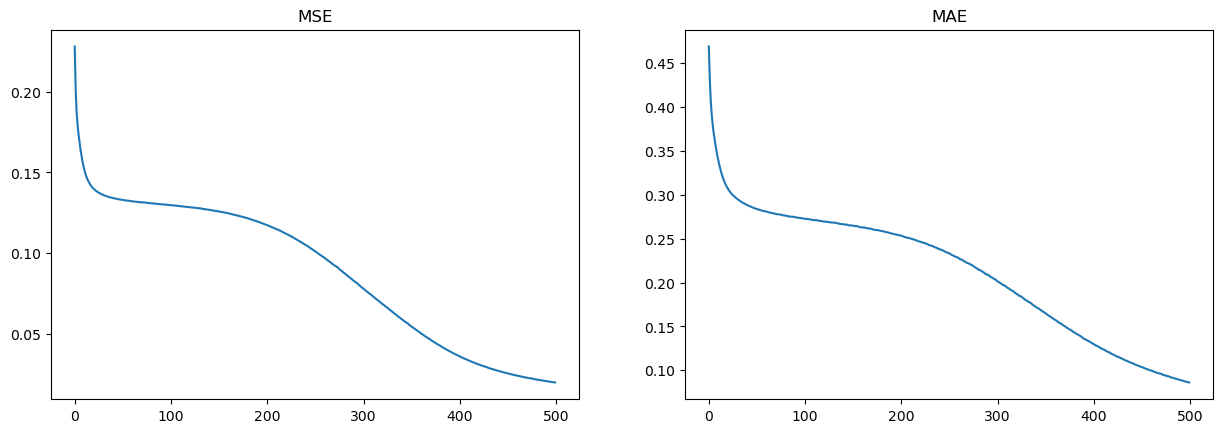

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')
ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])

Создаем поле точек и скалярное поле

In [14]:
pole = []
for y in np.linspace(-1,1,200):
    for x in np.linspace(-1,1,200):
        pole.append((x,y))

In [15]:
pred = model.predict(pole)
z = []
for i in range(200):
    z.append(pred[i*200: (i+1)*200])

1250/1250 [==============================] - 1s 855us/step


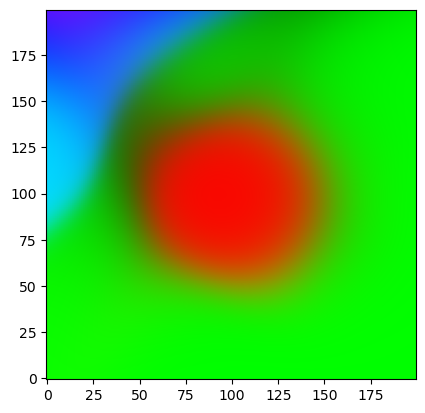

In [16]:
fig, ax = plt.subplots()
ax.imshow(z)
ax.invert_yaxis()

#### Аппроксимация функции

In [17]:
def func(t):
    return np.cos(t**2 - 2*t + 3)

In [18]:
h = 0.02
X = np.arange(0, 5+h,h)
y = func(X)

Создаем модель

In [19]:
model2 =  keras.Sequential([
        layers.Dense(100,input_dim=1, activation="tanh", name="tanh"),
        layers.Dense(30, activation="tanh", name="tanh2"),
        layers.Dense(1,activation='linear', name='linear')
    ]
)

Компилируем

In [20]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем

In [22]:
hist2 = model2.fit(X,y,batch_size=10,epochs=1000)

Epoch 1/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.4619 - mae: 0.5872
Epoch 2/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3489 - mae: 0.4865
Epoch 3/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3309 - mae: 0.4586
Epoch 4/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3414 - mae: 0.4626
Epoch 5/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3280 - mae: 0.4561
Epoch 6/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3301 - mae: 0.4566
Epoch 7/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3518 - mae: 0.4694
Epoch 8/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3219 - mae: 0.4520
Epoch 9/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3281 - mae: 0.4562
Epoch 10/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3572 - mae: 0.4588
Epoch 11/1000
26/26 [============================

26/26 [==============================] - 0s 1000us/step - loss: 0.2015 - mae: 0.2957
Epoch 170/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1975 - mae: 0.2926
Epoch 171/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1985 - mae: 0.2881
Epoch 172/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1951 - mae: 0.2917
Epoch 173/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1996 - mae: 0.2935
Epoch 174/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1953 - mae: 0.2912
Epoch 175/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1952 - mae: 0.2866
Epoch 176/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1921 - mae: 0.2873
Epoch 177/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1900 - mae: 0.2797
Epoch 178/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1930 - mae: 0.2806
Epoch 179/1000
26/26 [====================

26/26 [==============================] - 0s 1ms/step - loss: 0.1100 - mae: 0.1663
Epoch 336/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1150 - mae: 0.1728
Epoch 337/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.1112 - mae: 0.1722
Epoch 338/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.1136 - mae: 0.1691
Epoch 339/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.1161 - mae: 0.1814
Epoch 340/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1103 - mae: 0.1635
Epoch 341/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1083 - mae: 0.1598
Epoch 342/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1088 - mae: 0.1632
Epoch 343/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1071 - mae: 0.1619
Epoch 344/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1097 - mae: 0.1645
Epoch 345/1000
26/26 [==============

26/26 [==============================] - 0s 1ms/step - loss: 0.0442 - mae: 0.1019
Epoch 420/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0432 - mae: 0.0986
Epoch 421/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0451 - mae: 0.0993
Epoch 422/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0499 - mae: 0.1132
Epoch 423/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0450 - mae: 0.1101
Epoch 424/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0422 - mae: 0.0955
Epoch 425/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.0419 - mae: 0.0876
Epoch 426/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.0437 - mae: 0.1016
Epoch 427/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0416 - mae: 0.0976
Epoch 428/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0424 - mae: 0.0932
Epoch 429/1000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0422
Epoch 587/1000
26/26 [==============================] - 0s 1000us/step - loss: 0.0040 - mae: 0.0372
Epoch 588/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0029 - mae: 0.0266
Epoch 589/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0243
Epoch 590/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0342
Epoch 591/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0435
Epoch 592/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0271
Epoch 593/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0289
Epoch 594/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0061 - mae: 0.0461
Epoch 595/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0352
Epoch 596/1000
26/26 [====================

26/26 [==============================] - 0s 1ms/step - loss: 2.8911e-04 - mae: 0.0122
Epoch 753/1000
26/26 [==============================] - 0s 1ms/step - loss: 2.9048e-04 - mae: 0.0115
Epoch 754/1000
26/26 [==============================] - 0s 1ms/step - loss: 3.4224e-04 - mae: 0.0142
Epoch 755/1000
26/26 [==============================] - 0s 1ms/step - loss: 2.4997e-04 - mae: 0.0110
Epoch 756/1000
26/26 [==============================] - 0s 1ms/step - loss: 2.8188e-04 - mae: 0.0096
Epoch 757/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0208
Epoch 758/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0014 - mae: 0.0222
Epoch 759/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0204 - mae: 0.0813
Epoch 760/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0383
Epoch 761/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0239
Epoch 762/1000
26/26 [===

26/26 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0270
Epoch 835/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0140 - mae: 0.0715
Epoch 836/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0248 - mae: 0.0887
Epoch 837/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0155 - mae: 0.0816
Epoch 838/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0096 - mae: 0.0596
Epoch 839/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0411
Epoch 840/1000
26/26 [==============================] - 0s 1ms/step - loss: 4.9535e-04 - mae: 0.0179
Epoch 841/1000
26/26 [==============================] - 0s 1ms/step - loss: 3.4327e-04 - mae: 0.0135
Epoch 842/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0232
Epoch 843/1000
26/26 [==============================] - 0s 1ms/step - loss: 4.4861e-04 - mae: 0.0135
Epoch 844/1000
26/26 [===========

26/26 [==============================] - 0s 1ms/step - loss: 1.5069e-04 - mae: 0.0080
Epoch 999/1000
26/26 [==============================] - 0s 1ms/step - loss: 1.4833e-04 - mae: 0.0075
Epoch 1000/1000
26/26 [==============================] - 0s 1ms/step - loss: 1.8709e-04 - mae: 0.0080


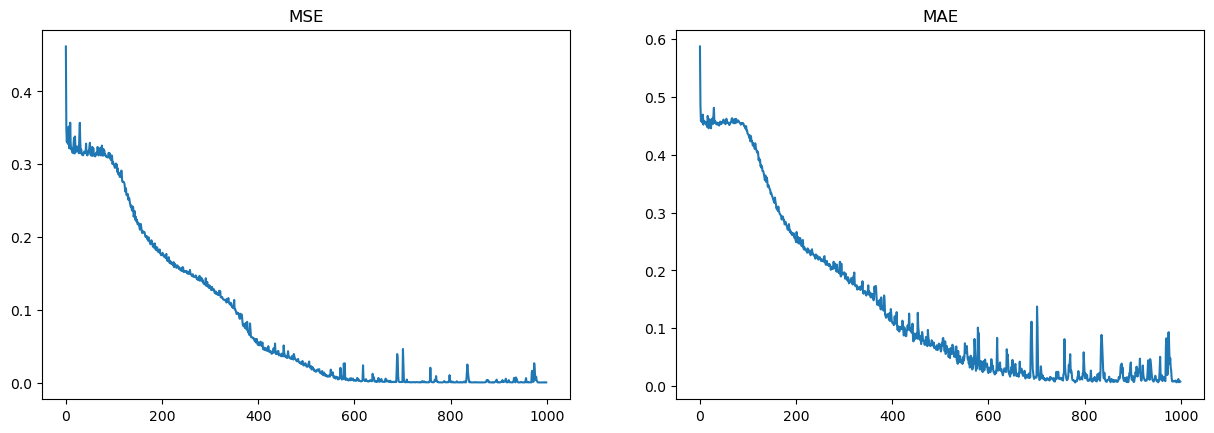

In [25]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(1000), hist2.history['loss'])
ax[1].plot(range(1000), hist2.history['mae'])

Аппроксимируем функцию

63/63 [==============================] - 0s 758us/step


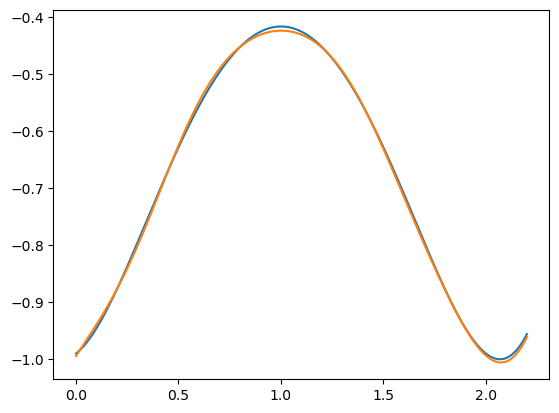

In [27]:
t = np.linspace(0, 2.2, 2000)
y_ans = func(t)
y_pred = model2.predict(t)
plt.plot(t, y_ans)
plt.plot(t, y_pred)